In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
data=pd.read_csv('./titanic/train.csv')
testdata=pd.read_csv('./titanic/test.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [264]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:title={'center':'Male and Female in ship'}, xlabel='Sex', ylabel='count'>

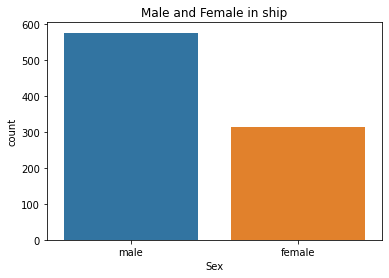

In [265]:
print(data.Sex.value_counts())
# plt.figure(figsize=(10,5))
plt.title("Male and Female in ship")
sns.countplot(x=data.Sex)

<AxesSubplot:title={'center':'Male and Female in ship survived'}, xlabel='Sex', ylabel='Survived'>

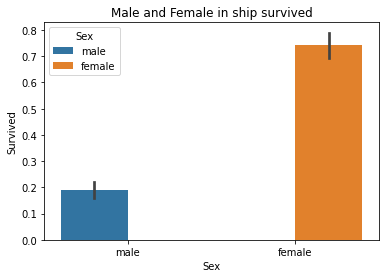

In [266]:
# plt.figure(figsize=(10,5))
plt.title("Male and Female in ship survived")
sns.barplot(x=data.Sex,y=data.Survived,hue=data.Sex)

In [267]:
data.Age.mean()
data.Age.fillna(data.Age.mean(),inplace=True)
testdata.Age.fillna(testdata.Age.mean(),inplace=True)

<AxesSubplot:title={'center':'Survived person age'}, xlabel='Survived', ylabel='Age'>

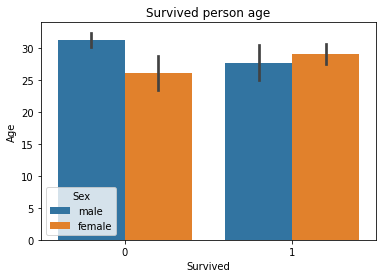

In [268]:
plt.title("Survived person age")
sns.barplot(x='Survived', y='Age',hue='Sex', data=data)

<AxesSubplot:title={'center':'People in class'}, xlabel='Pclass', ylabel='count'>

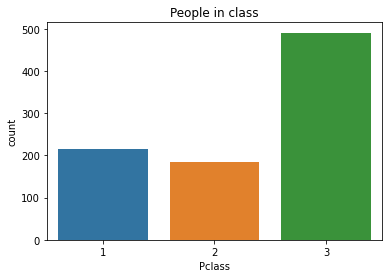

In [269]:
plt.title("People in class")
sns.countplot(x=data.Pclass)

<AxesSubplot:title={'center':'total grouped by survival in each classes'}, xlabel='Pclass', ylabel='count'>

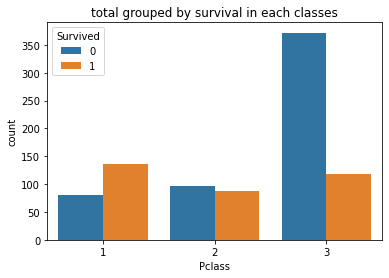

In [270]:
plt.title("total grouped by survival in each classes")
sns.countplot(x=data.Pclass,hue=data.Survived)

<AxesSubplot:title={'center':'Survived in each classes'}, xlabel='Pclass', ylabel='Survived'>

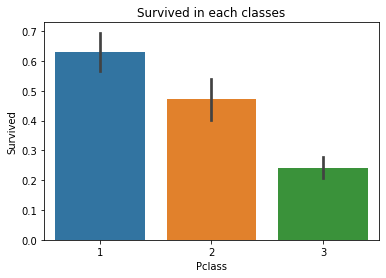

In [271]:
plt.title("Survived in each classes")
sns.barplot(x=data.Pclass,y=data.Survived)

<AxesSubplot:title={'center':'Survived male and female in each classes'}, xlabel='Pclass', ylabel='Survived'>

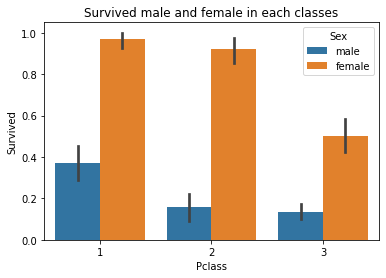

In [272]:
plt.title("Survived male and female in each classes")
sns.barplot(x=data.Pclass,y=data.Survived,hue=data.Sex)

In [273]:
print(f"Class 1 price: {data.Fare[data.Pclass==1].mean()}")
print(f"Class 2 price: {data.Fare[data.Pclass==2].mean()}")
print(f"Class 3 price: {data.Fare[data.Pclass==3].mean()}")

Class 1 price: 84.1546875
Class 2 price: 20.662183152173913
Class 3 price: 13.675550101832993


In [274]:
data['hasCabin']=data.Cabin.notnull().astype(int)
testdata['hasCabin']=testdata.Cabin.notnull().astype(int)
data.drop(columns=['Cabin'],inplace=True)
testdata.drop(columns=['Cabin'],inplace=True)

In [275]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [276]:
data['TicketPrefix'] = data['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).fillna('None')
data['TicketNumber'] = data['Ticket'].str.extract(r'(\d+)', expand=False)
data['TicketNumber'] = pd.to_numeric(data['TicketNumber'], errors='coerce')  
testdata['TicketPrefix'] = testdata['Ticket'].str.extract(r'([A-Za-z./]+)', expand=False).fillna('None')
testdata['TicketNumber'] = testdata['Ticket'].str.extract(r'(\d+)', expand=False)
testdata['TicketNumber'] = pd.to_numeric(testdata['TicketNumber'], errors='coerce')  

<AxesSubplot:title={'center':'class having cabin'}, xlabel='Pclass', ylabel='hasCabin'>

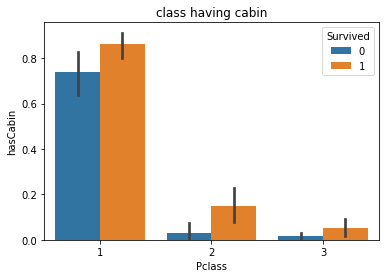

In [277]:
plt.title("class having cabin")
sns.barplot(x=data.Pclass,y=data.hasCabin,hue=data.Survived)

<AxesSubplot:title={'center':'people from different port'}, xlabel='Embarked', ylabel='count'>

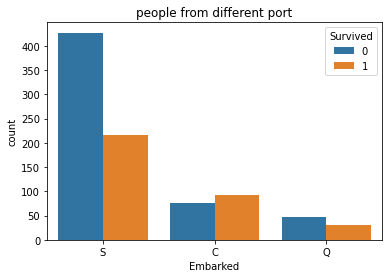

In [278]:
plt.title("people from different port")
sns.countplot(x=data.Embarked,hue=data.Survived)

<AxesSubplot:title={'center':'Correlation heatmap'}>

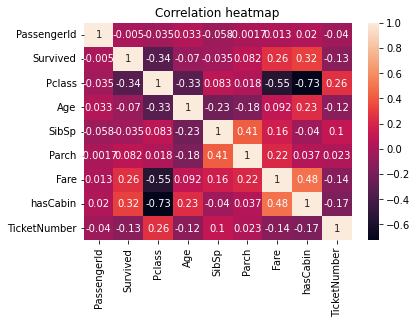

In [279]:
plt.title("Correlation heatmap")
sns.heatmap(data.corr(),annot=True)

In [280]:
data['familyof']=data.Parch+data.SibSp
data.drop(columns=['Parch','SibSp'],inplace=True)
testdata['familyof']=testdata.Parch+testdata.SibSp
testdata.drop(columns=['Parch','SibSp'],inplace=True)

In [281]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,hasCabin,TicketPrefix,TicketNumber,familyof
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,A/,5.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,PC,17599.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,STON/O,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,None,113803.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,None,373450.0,0


In [282]:
data.Embarked=data.Embarked.map({'S':1,'C':2,'Q':3})
data.Sex=data.Sex.map({'male':0,'female':1})
testdata.Embarked=testdata.Embarked.map({'S':1,'C':2,'Q':3})
testdata.Sex=testdata.Sex.map({'male':0,'female':1})

In [283]:
data.Embarked.fillna(data.Embarked.mode()[0],inplace=True)
testdata.Embarked.fillna(testdata.Embarked.mode()[0],inplace=True)

In [284]:
data.TicketNumber.mode()[0]

5.0

In [285]:
data.TicketNumber.fillna(data.TicketNumber.mode()[0],inplace=True)
testdata.TicketNumber.fillna(testdata.TicketNumber.mode()[0],inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Embarked      891 non-null    float64
 9   hasCabin      891 non-null    int32  
 10  TicketPrefix  891 non-null    object 
 11  TicketNumber  891 non-null    float64
 12  familyof      891 non-null    int64  
dtypes: float64(4), int32(1), int64(5), object(3)
memory usage: 87.1+ KB


In [287]:
X=data[['Pclass','Sex','Age','Fare','Embarked','familyof','hasCabin','TicketNumber']]
y=data['Survived']

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [289]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42,n_estimators=350,max_depth=8,min_samples_split=10)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9044943820224719

In [290]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8268156424581006


In [305]:
from xgboost import XGBClassifier
model2=XGBClassifier(random_state=42,max_depth=4,min_child_weight=5)
model2.fit(X_train,y_train)
model2.score(X_train,y_train)


0.9297752808988764

In [306]:
y_pred2=model2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8379888268156425

<AxesSubplot:>

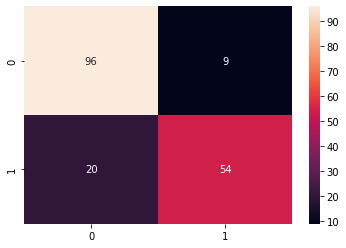

In [307]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d')

<AxesSubplot:>

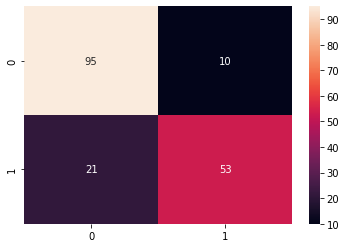

In [308]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [309]:
testdata.Fare.fillna(testdata.Fare.mean(),inplace=True)